In [157]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from white_demura import RGB_mask, sum_contour, read_and_extract_roi, apply_mask, get_signal_mapping, generate_mapping, extract_middle_roi


In [158]:
def RGB_mask_no_roi(image_path, output_path, threshold_val):
    """
    Preprocess an image by cropping and thresholding.

    Args:
        image_path (str): Path to the input grayscale image.
        threshold_val (int, optional): Threshold value for image thresholding.

    Returns:
        tuple: Tuple containing threshold value and path to the preprocessed image.
    """

    df = pd.DataFrame(columns=['id', 'x', 'y', 'area', 'perimeter', 'total_signal'])

    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

 
    # Filter out pixels with intensities below the threshold_val
    _, image_filtered = cv2.threshold(image, threshold_val, 255, cv2.THRESH_TOZERO)


    binary_image = np.where(image_filtered > 0,255,0)
    cv2.imwrite("binary.png", binary_image)


    print("Threshold value:", threshold_val)

    # Save and download to local disk
    # Extract the filename from the original image path
    filename = image_path.split("/")[-1]

    # Create the new path by concatenating the desired directory and the filename
    new_path = os.path.dirname(image_path) + "/thresholded/"

    # Create the folder if it doesn't exist
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    contours, _ = cv2.findContours(image_filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
   # cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    # Create a copy of the original image
    image_with_rectangles = np.copy(image_filtered)

    
    threshold_area = 100

    id = 0
    for i in range(0, len(contours)):
        contour = contours[i]
    #for contour in contours:
        area = cv2.contourArea(contour)    
             
        if area > threshold_area:  
            filtered_contours.append(contour)
            x, y, w, h = cv2.boundingRect(contour)
            #cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (155), 1)  # Adjust color and thickness as needed
            cv2.drawContours(image_with_rectangles, [contour], -1, 100, 1)

            M = cv2.moments(contour)
            area = M["m00"]
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Perimeter
            perimeter = cv2.arcLength(contour, True)
            centroid = [cX, cY]
            cv2.circle(image_with_rectangles, (cX, cY), 0, (0), -1)
            cv2.putText(image_with_rectangles, str(id), (cX - 2, cY - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
            

            signal = sum_contour(contour, image)
            df.loc[len(df.index)] = [id, cX, cY, area, perimeter, signal]
            print("ID :", id)
            id = id + 1
                
    #Check the images with bounding rectangles
    cv2.imwrite(output_path, image_with_rectangles)
    
    new_path += filename

    cv2.imwrite(new_path, image_filtered)

    print("Saved thresholded image to: {}".format(new_path))

    return threshold_val, new_path, filtered_contours, df, binary_image

In [159]:
# width_ratio = 2, 4 

def scale_image(image, width_ratio, height_ratio):
    width = image.shape[1]
    height = image.shape[0]
    resized_image = cv2.resize(image, (int(width // width_ratio), int(height // height_ratio)))
    return resized_image


In [160]:
blue_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Z_300000000.bmp', -2100, -200)
blue_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Z_110000000.bmp', -2100, -200)
blue_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Z_21000000.bmp', -2100, -200)
blue_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Z_6500000.bmp', -2100, -200)
blue_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Z_1100000.bmp', -2100, -200)
blue_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Z_200000.bmp', -2100, -200)
blue_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Z_40000.bmp', -2100, -200)

In [161]:
green_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Y_200000000.bmp', -2100, -200)
green_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Y_40000000.bmp', -2100, -200)
green_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Y_12500000.bmp', -2100, -200)
green_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Y_3000000.bmp', -2100, -200)
green_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Y_650000.bmp', -2100, -200)
green_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Y_130000.bmp', -2100, -200)
green_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Y_25000.bmp', -2100, -200)

In [162]:
red_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_X_200000000.bmp', -2100, -200)
red_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_X_70000000.bmp', -2100, -200)
red_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_X_16000000.bmp', -2100, -200)
red_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_X_5000000.bmp', -2100, -200)
red_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_X_850000.bmp', -2100, -200)
red_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_X_180000.bmp', -2100, -200)
red_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_X_30000.bmp', -2100, -200)

In [163]:
clear_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_clear_200000000.bmp', -2100, -200)
clear_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_clear_70000000.bmp', -2100, -200)
clear_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_clear_16000000.bmp', -2100, -200)
clear_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_clear_4000000.bmp', -2100, -200)
clear_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_clear_700000.bmp', -2100, -200)
clear_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_clear_180000.bmp', -2100, -200)
clear_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_clear_30000.bmp', -2100, -200)

In [164]:
contours, _ = cv2.findContours(green_image_255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [165]:
len(contours)

1

In [166]:
red_image_4_4x4 = scale_image(red_image_4, 4, 4)
red_image_8_4x4 = scale_image(red_image_8, 4, 4)
red_image_16_4x4 = scale_image(red_image_16, 4, 4)
red_image_32_4x4 = scale_image(red_image_32, 4, 4)
red_image_64_4x4 = scale_image(red_image_64, 4, 4)
red_image_128_4x4 = scale_image(red_image_128, 4, 4)
red_image_255_4x4 = scale_image(red_image_255, 4, 4)

In [167]:
blue_image_4_4x4 = scale_image(blue_image_4, 4, 4)
blue_image_8_4x4 = scale_image(blue_image_8, 4, 4)
blue_image_16_4x4 = scale_image(blue_image_16, 4, 4)
blue_image_32_4x4 = scale_image(blue_image_32, 4, 4)
blue_image_64_4x4 = scale_image(blue_image_64, 4, 4)
blue_image_128_4x4 = scale_image(blue_image_128, 4, 4)
blue_image_255_4x4 = scale_image(blue_image_255, 4, 4)

In [168]:
green_image_4_4x4 = scale_image(green_image_4, 4, 4)
green_image_8_4x4 = scale_image(green_image_8, 4, 4)
green_image_16_4x4 = scale_image(green_image_16, 4, 4)
green_image_32_4x4 = scale_image(green_image_32, 4, 4)
green_image_64_4x4 = scale_image(green_image_64, 4, 4)
green_image_128_4x4 = scale_image(green_image_128, 4, 4)
green_image_255_4x4 = scale_image(green_image_255, 4, 4)

In [169]:
clear_image_4_4x4 = scale_image(clear_image_4, 4, 4)
clear_image_8_4x4 = scale_image(clear_image_8, 4, 4)
clear_image_16_4x4 = scale_image(clear_image_16, 4, 4)
clear_image_32_4x4 = scale_image(clear_image_32, 4, 4)
clear_image_64_4x4 = scale_image(clear_image_64, 4, 4)
clear_image_128_4x4 = scale_image(clear_image_128, 4, 4)
clear_image_255_4x4 = scale_image(clear_image_255, 4, 4)

In [170]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_4_4x4.png', blue_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_8_4x4.png', blue_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_16_4x4.png', blue_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_32_4x4.png', blue_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_64_4x4.png', blue_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_128_4x4.png', blue_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.png', blue_image_255_4x4)



True

In [171]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_4_4x4.png', red_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_8_4x4.png', red_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_16_4x4.png', red_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_32_4x4.png', red_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_64_4x4.png', red_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_128_4x4.png', red_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_255_4x4.png', red_image_255_4x4)



True

In [172]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_4_4x4.png', green_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_8_4x4.png', green_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_16_4x4.png', green_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_32_4x4.png', green_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_64_4x4.png', green_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_128_4x4.png', green_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_255_4x4.png', green_image_255_4x4)

True

In [173]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_4_4x4.png', clear_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_8_4x4.png', clear_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_16_4x4.png', clear_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_32_4x4.png', clear_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_64_4x4.png', clear_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_128_4x4.png', clear_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_255_4x4.png', clear_image_255_4x4)


True

In [174]:
clear_image_4_4x4

array([[ 12,  20,  25, ...,   9,  37, 103],
       [ 10,  18,  22, ...,  11, 169, 255],
       [ 15, 232, 255, ...,  10,  34, 116],
       ...,
       [ 20,  13, 118, ...,  96,  20,   9],
       [ 75,  19,  14, ...,  28,  18,   8],
       [120,  29,  12, ...,  16,  11,   8]], dtype=uint8)

In [175]:
a, b, contours, df, binary = RGB_mask_no_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.png','/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/contour_4x4.png', 10)

Threshold value: 10
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/thresholded/blue_image_255_4x4.png


In [176]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/binary4x4_blue.png', binary)

True

In [177]:
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [178]:

def check(i, j, n, m):
    return i >= 0 and j >= 0 and i < n and j < m
 
def mark_component(v, vis, i, j, n, m, l):
    if not check(i, j, n, m):
        return
    
    vis[i][j] = True
    if v[i][j] == 255:
        v[i][j] = 0
        #add point to list
        l.append([i, j])

        #marking(connecting all possible part of single island.
        mark_component(v, vis, i + 1, j, n, m, l)
        mark_component(v, vis, i - 1, j, n, m, l)
        mark_component(v, vis, i, j + 1, n, m, l)
        mark_component(v, vis, i, j - 1, n, m, l)

 
v = binary.copy()
n = len(v)
m = len(v[0])
cnt = 0
vis = [[False for j in range(m)] for i in range(n)]
mapping = {}
idx = 0
for i in range(n):
    for j in range(m):
        if not vis[i][j] and v[i][j] == 255:
            cnt += 1
            lst = []
            mark_component(v, vis, i, j, n, m, lst)
            if len(lst) > 8:
                mapping[idx] = lst
                idx = idx + 1

print("The number of islands in the matrix are:")
print(len(mapping))

The number of islands in the matrix are:
1436


In [179]:
mask_image = np.zeros(binary.shape)

In [180]:
for item in mapping:
    for dot in mapping[item]:
        mask_image[dot[0]][dot[1]] = 255

In [181]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/mask_image_blue.png', mask_image)

True

In [182]:
covered_pixels_mapping = mapping

In [183]:
signal_map_4 = get_signal_mapping(clear_image_4_4x4, covered_pixels_mapping)
signal_map_8 = get_signal_mapping(clear_image_8_4x4, covered_pixels_mapping)
signal_map_16 = get_signal_mapping(clear_image_16_4x4, covered_pixels_mapping)
signal_map_32 = get_signal_mapping(clear_image_32_4x4, covered_pixels_mapping)
signal_map_64 = get_signal_mapping(clear_image_64_4x4, covered_pixels_mapping)
signal_map_128 = get_signal_mapping(clear_image_128_4x4, covered_pixels_mapping)
signal_map_255 = get_signal_mapping(clear_image_255_4x4, covered_pixels_mapping)

In [184]:
signal_map_ground_truth_4 = get_signal_mapping(blue_image_4_4x4, covered_pixels_mapping)
signal_map_ground_truth_8 = get_signal_mapping(blue_image_8_4x4, covered_pixels_mapping)
signal_map_ground_truth_16 = get_signal_mapping(blue_image_16_4x4, covered_pixels_mapping)
signal_map_ground_truth_32 = get_signal_mapping(blue_image_32_4x4, covered_pixels_mapping)
signal_map_ground_truth_64 = get_signal_mapping(blue_image_64_4x4, covered_pixels_mapping)
signal_map_ground_truth_128 = get_signal_mapping(blue_image_128_4x4, covered_pixels_mapping)
signal_map_ground_truth_255 = get_signal_mapping(blue_image_255_4x4, covered_pixels_mapping)

## 
(16_Blue) / mean(16_Blue)   = A


(16_ground_truth) / mean(16_ground_truth)   = B 


(A - B) / B 

In [185]:
dff = pd.DataFrame()

In [186]:
dff["4_ground_truth_mapping"] = signal_map_ground_truth_4.values()
dff["8_ground_truth_mapping"] = signal_map_ground_truth_8.values()
dff["16_ground_truth_mapping"] = signal_map_ground_truth_16.values()
dff["32_ground_truth_mapping"] = signal_map_ground_truth_32.values()
dff["64_ground_truth_mapping"] = signal_map_ground_truth_64.values()
dff["128_ground_truth_mapping"] = signal_map_ground_truth_128.values()
dff["255_ground_truth_mapping"] = signal_map_ground_truth_255.values()

In [187]:
dff["4_mapping"] = signal_map_4.values()
dff["8_mapping"] = signal_map_8.values()
dff["16_mapping"] = signal_map_16.values()
dff["32_mapping"] = signal_map_32.values()
dff["64_mapping"] = signal_map_64.values()
dff["128_mapping"] = signal_map_128.values()
dff["255_mapping"] = signal_map_255.values()

In [188]:
dff["4_diff"] = dff["4_ground_truth_mapping"] - dff["4_mapping"]
dff["8_diff"] = dff["8_ground_truth_mapping"] - dff["8_mapping"]
dff["16_diff"] = dff["16_ground_truth_mapping"] - dff["16_mapping"]
dff["32_diff"] = dff["32_ground_truth_mapping"] - dff["32_mapping"]
dff["64_diff"] = dff["64_ground_truth_mapping"] - dff["64_mapping"]
dff["128_diff"] = dff["128_ground_truth_mapping"] - dff["128_mapping"]
dff["255_diff"] = dff["255_ground_truth_mapping"] - dff["255_mapping"]


In [189]:
dff["4_to_gt_ratio"] = dff["4_mapping"] / dff["4_ground_truth_mapping"]
dff["8_to_gt_ratio"] = dff["8_mapping"] / dff["8_ground_truth_mapping"] 
dff["16_to_gt_ratio"] = dff["16_mapping"] / dff["16_ground_truth_mapping"]
dff["32_to_gt_ratio"] = dff["32_mapping"] / dff["32_ground_truth_mapping"]
dff["64_to_gt_ratio"] = dff["64_mapping"] / dff["64_ground_truth_mapping"]
dff["128_to_gt_ratio"] = dff["128_mapping"] / dff["128_ground_truth_mapping"]
dff["255_to_gt_ratio"] = dff["255_mapping"] / dff["255_ground_truth_mapping"]

In [190]:
dff["4_diff_percentage"] = ((dff['4_to_gt_ratio'].mean() - 1) * 100)
dff["8_diff_percentage"] = ((dff['8_to_gt_ratio'].mean() - 1) * 100)
dff["16_diff_percentage"] = ((dff['16_to_gt_ratio'].mean() - 1) * 100)
dff["32_diff_percentage"] = ((dff['32_to_gt_ratio'].mean() - 1) * 100)
dff["64_diff_percentage"] = ((dff['64_to_gt_ratio'].mean() - 1) * 100)
dff["128_diff_percentage"] = ((dff['128_to_gt_ratio'].mean() - 1) * 100)
dff["255_diff_percentage"] = ((dff['255_to_gt_ratio'].mean() - 1) * 100)


In [191]:
dff['4_normalized'] = dff['4_to_gt_ratio'].mean() * dff["4_ground_truth_mapping"]
dff['8_normalized'] = dff['8_to_gt_ratio'].mean() * dff["8_ground_truth_mapping"]
dff['16_normalized'] = dff['16_to_gt_ratio'].mean() * dff["16_ground_truth_mapping"]
dff['32_normalized'] = dff['32_to_gt_ratio'].mean() * dff["32_ground_truth_mapping"]
dff['64_normalized'] = dff['64_to_gt_ratio'].mean() * dff["64_ground_truth_mapping"]
dff['128_normalized'] = dff['128_to_gt_ratio'].mean() * dff["128_ground_truth_mapping"]
dff['255_normalized'] = dff['255_to_gt_ratio'].mean() * dff["255_ground_truth_mapping"]


<AxesSubplot:xlabel='index'>

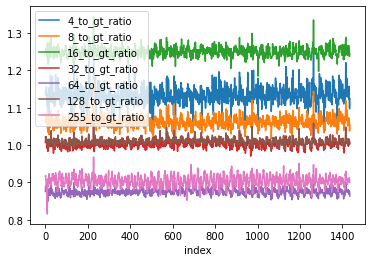

In [192]:
dff.reset_index().plot(x='index', y=["4_to_gt_ratio", "8_to_gt_ratio", "16_to_gt_ratio", "32_to_gt_ratio", "64_to_gt_ratio", "128_to_gt_ratio", "255_to_gt_ratio"])

In [193]:
new_df = pd.DataFrame()

In [194]:
new_df['4_diff'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - (dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))/((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))
new_df['8_diff'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - (dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))/((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))
new_df['16_diff'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - (dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))/((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))
new_df['32_diff'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - (dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))/((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))
new_df['64_diff'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - (dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))/((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))
new_df['128_diff'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - (dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))/((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))
new_df['255_diff'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - (dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))/((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))

In [195]:
new_df['A-1_4'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - 1)
new_df['A-1_8'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - 1)
new_df['A-1_16'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - 1)
new_df['A-1_32'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - 1)
new_df['A-1_64'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - 1)
new_df['A-1_128'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - 1)
new_df['A-1_255'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - 1)

In [196]:
new_df['B-1_4'] = 100 * ((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()) - 1)
new_df['B-1_8'] = 100 * ((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()) - 1)
new_df['B-1_16'] = 100 * ((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()) - 1)
new_df['B-1_32'] = 100 * ((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()) - 1)
new_df['B-1_64'] = 100 * ((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()) - 1)
new_df['B-1_128'] = 100 * ((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()) - 1)
new_df['B-1_255'] = 100 * ((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()) - 1)

In [197]:
new_df

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,0.701441,0.062895,0.231911,0.319096,0.097440,1.143723,1.413963,3.428296,0.329820,-2.785270,...,-3.894511,-3.342158,-3.487568,2.707861,0.266757,-3.010201,-3.057805,-3.988065,-4.435155,-4.833191
1,1.473111,1.092550,0.564014,1.418847,1.726320,0.805703,1.640880,-3.335641,-3.109642,-6.284392,...,-5.591541,-5.962400,-3.568331,-4.738942,-4.156777,-6.809997,-6.786351,-7.193675,-6.714009,-5.125114
2,0.322364,0.254307,0.457177,0.508128,0.498342,0.532084,0.362437,-6.760419,-6.402743,-5.143374,...,-6.574032,-3.778865,0.712136,-7.060024,-6.640164,-5.575063,-7.790190,-7.037304,-4.288132,0.348437
3,1.756175,1.285566,0.769457,1.130874,0.118345,0.178759,-0.058683,-35.442935,-22.575529,-14.803993,...,-9.432188,-6.326323,-3.649095,-36.557103,-23.558239,-15.454533,-12.809387,-9.539244,-6.493475,-3.592520
4,0.938931,2.117180,0.054862,0.976623,0.835423,1.236145,-2.016007,-1.794491,-1.572861,-4.382696,...,-1.214990,-0.649130,-3.891385,-2.707996,-3.613536,-4.435124,-2.627588,-2.033425,-1.862255,-1.913964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.620435,1.179581,-0.407606,0.618565,0.325760,0.567488,0.414496,22.350194,15.112186,5.582195,...,0.482040,-1.231407,-2.679932,23.114037,13.770174,6.014315,3.897367,0.155772,-1.788744,-3.081655
1432,2.440661,0.891253,0.582928,0.708124,-0.788594,-0.223078,0.649789,-32.531873,-21.624189,-13.815111,...,-8.003110,-5.161771,-3.406804,-34.139309,-22.316545,-14.314595,-11.733845,-7.271861,-4.949735,-4.030404
1433,-1.295680,-0.504989,-0.971048,0.975651,0.189235,-0.055435,1.023069,33.737581,19.063907,14.862474,...,6.376986,1.316052,-2.679932,35.493139,19.668219,15.988781,8.271238,6.176065,1.372247,-3.665500
1434,-2.881502,-2.143466,-0.566030,0.433761,0.031452,-0.359072,0.423463,44.268774,22.722909,14.482135,...,6.287669,3.645156,2.165880,48.549223,25.411052,15.133826,10.207214,6.254250,4.018658,1.735070


In [198]:
new_df[new_df['4_diff'] < 10]

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,0.701441,0.062895,0.231911,0.319096,0.097440,1.143723,1.413963,3.428296,0.329820,-2.785270,...,-3.894511,-3.342158,-3.487568,2.707861,0.266757,-3.010201,-3.057805,-3.988065,-4.435155,-4.833191
1,1.473111,1.092550,0.564014,1.418847,1.726320,0.805703,1.640880,-3.335641,-3.109642,-6.284392,...,-5.591541,-5.962400,-3.568331,-4.738942,-4.156777,-6.809997,-6.786351,-7.193675,-6.714009,-5.125114
2,0.322364,0.254307,0.457177,0.508128,0.498342,0.532084,0.362437,-6.760419,-6.402743,-5.143374,...,-6.574032,-3.778865,0.712136,-7.060024,-6.640164,-5.575063,-7.790190,-7.037304,-4.288132,0.348437
3,1.756175,1.285566,0.769457,1.130874,0.118345,0.178759,-0.058683,-35.442935,-22.575529,-14.803993,...,-9.432188,-6.326323,-3.649095,-36.557103,-23.558239,-15.454533,-12.809387,-9.539244,-6.493475,-3.592520
4,0.938931,2.117180,0.054862,0.976623,0.835423,1.236145,-2.016007,-1.794491,-1.572861,-4.382696,...,-1.214990,-0.649130,-3.891385,-2.707996,-3.613536,-4.435124,-2.627588,-2.033425,-1.862255,-1.913964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.620435,1.179581,-0.407606,0.618565,0.325760,0.567488,0.414496,22.350194,15.112186,5.582195,...,0.482040,-1.231407,-2.679932,23.114037,13.770174,6.014315,3.897367,0.155772,-1.788744,-3.081655
1432,2.440661,0.891253,0.582928,0.708124,-0.788594,-0.223078,0.649789,-32.531873,-21.624189,-13.815111,...,-8.003110,-5.161771,-3.406804,-34.139309,-22.316545,-14.314595,-11.733845,-7.271861,-4.949735,-4.030404
1433,-1.295680,-0.504989,-0.971048,0.975651,0.189235,-0.055435,1.023069,33.737581,19.063907,14.862474,...,6.376986,1.316052,-2.679932,35.493139,19.668219,15.988781,8.271238,6.176065,1.372247,-3.665500
1434,-2.881502,-2.143466,-0.566030,0.433761,0.031452,-0.359072,0.423463,44.268774,22.722909,14.482135,...,6.287669,3.645156,2.165880,48.549223,25.411052,15.133826,10.207214,6.254250,4.018658,1.735070


<AxesSubplot:>

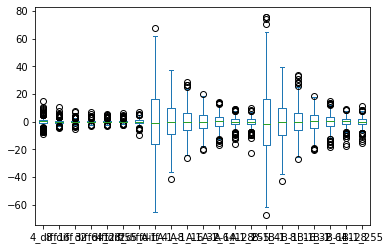

In [199]:
new_df.plot.box()

<AxesSubplot:>

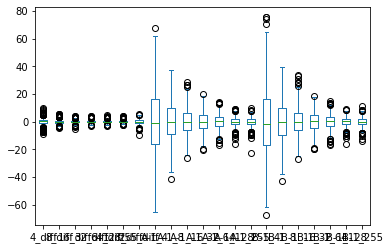

In [200]:
new_df[new_df['4_diff'] < 10].plot.box()

In [201]:
new_df[new_df['4_diff'] > 10].count()

4_diff      2
8_diff      2
16_diff     2
32_diff     2
64_diff     2
128_diff    2
255_diff    2
A-1_4       2
A-1_8       2
A-1_16      2
A-1_32      2
A-1_64      2
A-1_128     2
A-1_255     2
B-1_4       2
B-1_8       2
B-1_16      2
B-1_32      2
B-1_64      2
B-1_128     2
B-1_255     2
dtype: int64

<AxesSubplot:xlabel='index'>

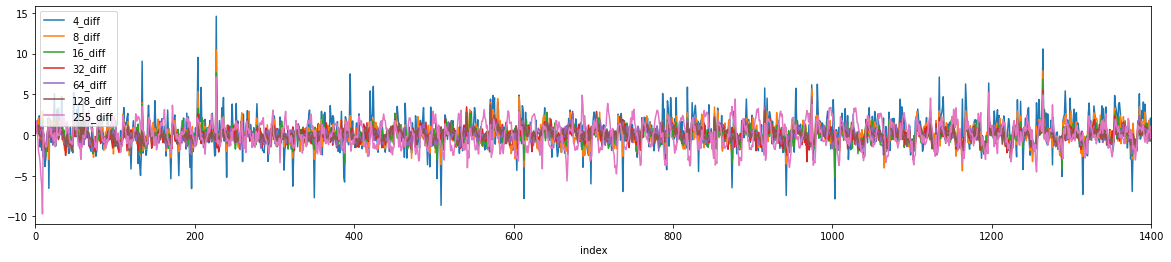

In [202]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

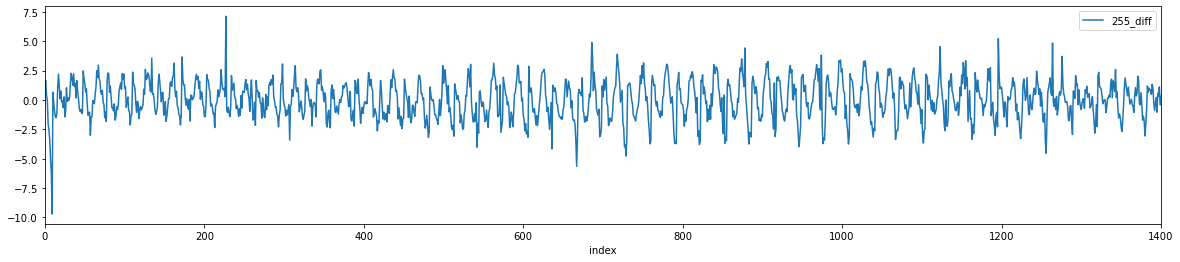

In [203]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['255_diff'])

<AxesSubplot:xlabel='index'>

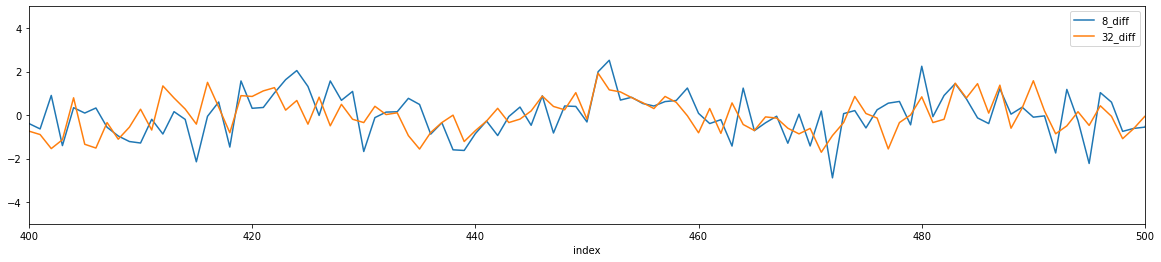

In [204]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[400, 500], x='index',ylim=[-5, 5], y=['8_diff', '32_diff'])

<AxesSubplot:xlabel='index'>

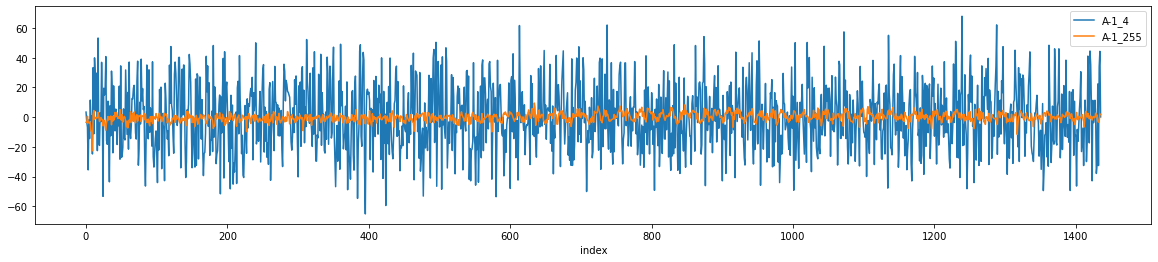

In [205]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_4', 'A-1_255'])

<AxesSubplot:xlabel='index'>

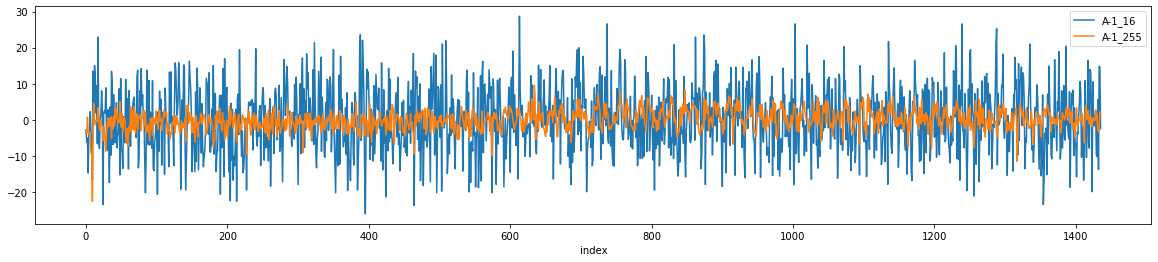

In [206]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_16', 'A-1_255'])

<AxesSubplot:xlabel='index'>

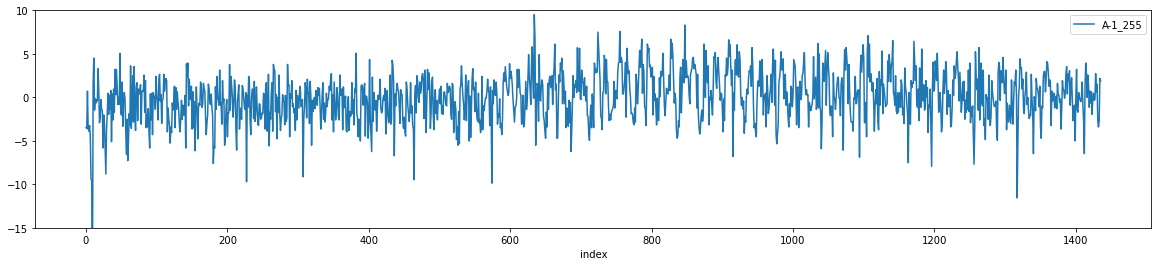

In [207]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_255'], ylim=[-15, 10])

<AxesSubplot:xlabel='index'>

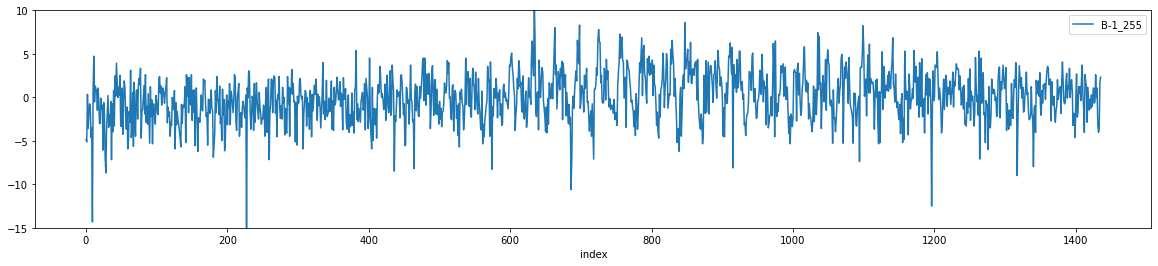

In [208]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['B-1_255'], ylim=[-15, 10])

In [209]:
new_df[new_df['A-1_255'] > 5].count()

4_diff      49
8_diff      49
16_diff     49
32_diff     49
64_diff     49
128_diff    49
255_diff    49
A-1_4       49
A-1_8       49
A-1_16      49
A-1_32      49
A-1_64      49
A-1_128     49
A-1_255     49
B-1_4       49
B-1_8       49
B-1_16      49
B-1_32      49
B-1_64      49
B-1_128     49
B-1_255     49
dtype: int64

In [210]:
new_df[new_df['A-1_255'] < -5].count()

4_diff      46
8_diff      46
16_diff     46
32_diff     46
64_diff     46
128_diff    46
255_diff    46
A-1_4       46
A-1_8       46
A-1_16      46
A-1_32      46
A-1_64      46
A-1_128     46
A-1_255     46
B-1_4       46
B-1_8       46
B-1_16      46
B-1_32      46
B-1_64      46
B-1_128     46
B-1_255     46
dtype: int64

<AxesSubplot:xlabel='index'>

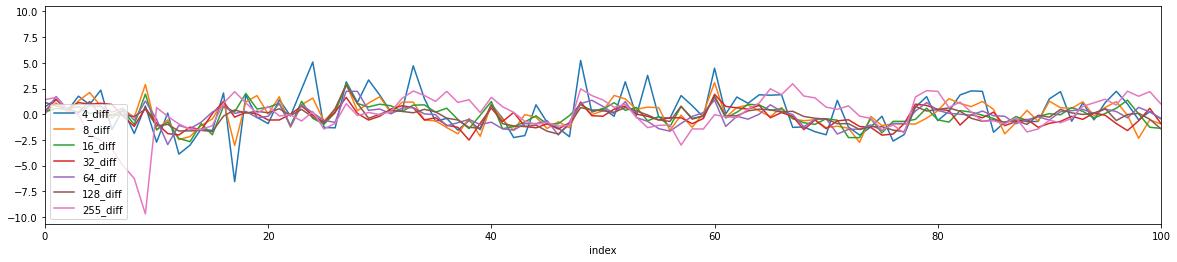

In [211]:
new_df[new_df['4_diff'] < 10].reset_index().plot(figsize=[20, 4],xlim=[0, 100], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

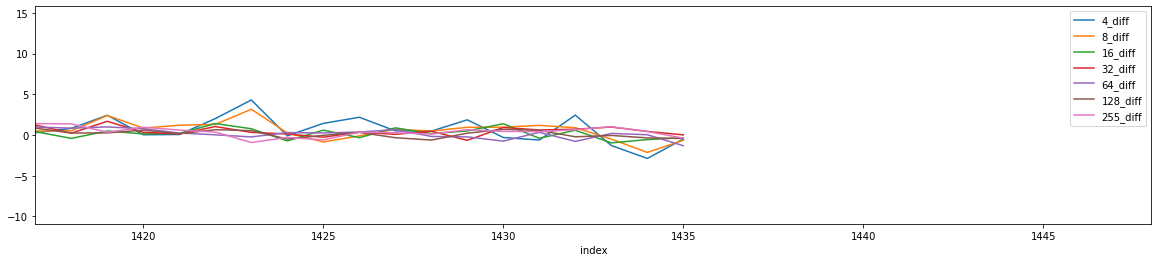

In [212]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[1417, 1448], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [213]:
dff

,4_ground_truth_mapping,8_ground_truth_mapping,16_ground_truth_mapping,32_ground_truth_mapping,64_ground_truth_mapping,128_ground_truth_mapping,255_ground_truth_mapping,4_mapping,8_mapping,16_mapping,...,64_diff_percentage,128_diff_percentage,255_diff_percentage,4_normalized,8_normalized,16_normalized,32_normalized,64_normalized,128_normalized,255_normalized
0,1062,1292,1021,1352,1228,1300,1304,1208,1371,1278,...,-12.459324,1.002009,-9.624845,1202.916840,1371.280557,1275.413295,1356.755298,1074.999504,1313.026115,1178.492024
1,985,1235,981,1300,1187,1269,1300,1129,1324,1232,...,-12.459324,1.002009,-9.624845,1115.699706,1310.782886,1225.446075,1304.572402,1039.107827,1281.715492,1174.877017
2,961,1203,994,1286,1189,1302,1375,1089,1279,1247,...,-12.459324,1.002009,-9.624845,1088.515144,1276.819281,1241.685422,1290.523160,1040.858641,1315.046155,1242.658384
3,656,985,890,1216,1157,1272,1321,754,1058,1120,...,-12.459324,1.002009,-9.624845,743.044677,1045.442221,1111.770649,1220.276954,1012.845624,1284.745553,1193.855800
4,1006,1242,1006,1358,1253,1335,1344,1147,1345,1257,...,-12.459324,1.002009,-9.624845,1139.486197,1318.212424,1256.675588,1362.776401,1096.884673,1348.376818,1214.642086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1273,1466,1116,1449,1281,1336,1328,1429,1573,1388,...,-12.459324,1.002009,-9.624845,1441.914442,1555.957660,1394.085443,1454.096469,1121.396063,1349.386838,1200.182061
1432,681,1001,902,1231,1186,1293,1315,788,1071,1133,...,-12.459324,1.002009,-9.624845,771.361929,1062.424023,1126.760815,1235.329713,1038.232420,1305.955974,1188.433291
1433,1401,1542,1221,1510,1358,1379,1320,1562,1627,1510,...,-12.459324,1.002009,-9.624845,1586.898769,1636.621223,1525.249396,1515.311020,1188.802384,1392.817702,1192.952048
1434,1536,1616,1212,1537,1359,1415,1394,1685,1677,1505,...,-12.459324,1.002009,-9.624845,1739.811927,1715.162059,1514.006772,1542.405985,1189.677790,1429.178425,1259.829663


<AxesSubplot:xlabel='index'>

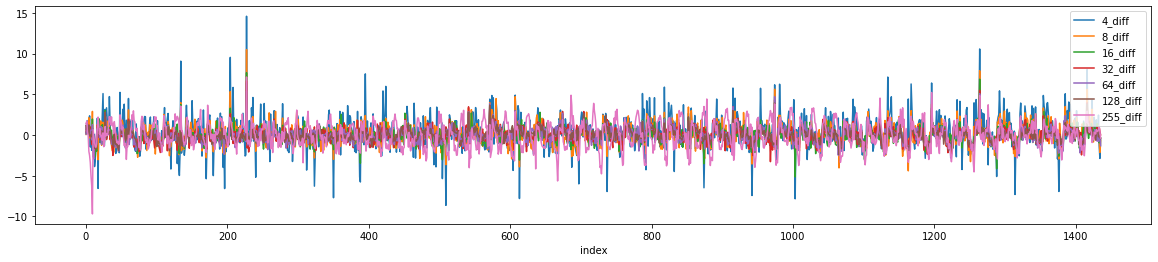

In [214]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [215]:
blue_mask_image = mask_image

In [216]:
green_mask_image = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/green_mask_image.png', cv2.IMREAD_GRAYSCALE)

In [217]:
over_lap_image = np.zeros(blue_mask_image.shape)

In [155]:
over_lap_image = green_mask_image * blue_mask_image

In [156]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/overlap.png' , over_lap_image)

True